###  1.0 Importando bibliotecas


In [4]:
import pandas as pd

### 2.0 Carregando os dados


In [11]:
imoveis = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
df_raw = pd.read_csv(imoveis, sep=';')

df_raw.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [12]:
df_raw.tail()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN
32959,Conjunto Comercial/Sala,Centro,0,0,0,250,6500.0,4206.0,1109.0


In [13]:
type(df_raw)

pandas.core.frame.DataFrame

### 3.0 Caracteristicas Gerais:

In [22]:
# Quantitade de Linhas e Colunas
print(f'Quantidade de linhas: {df_raw.shape[0]} \nQuantidade de colunas: {df_raw.shape[1]}')

print('--'*50)
# Colunas da base de dados
print(list(df_raw.columns))

Quantidade de linhas: 32960 
Quantidade de colunas: 9
----------------------------------------------------------------------------------------------------
['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor', 'Condominio', 'IPTU']


In [25]:
# Explorar diferentes colunas existentes
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [31]:
# Verificar os tipos de dados de cada coluna

## Dados Object (Strings)

df_raw[['Tipo','Bairro']]

,Tipo,Bairro
0,Quitinete,Copacabana
1,Casa,Jardim Botânico
2,Conjunto Comercial/Sala,Barra da Tijuca
3,Apartamento,Centro
4,Apartamento,Higienópolis
...,...,...
32955,Quitinete,Centro
32956,Apartamento,Jacarepaguá
32957,Apartamento,São Francisco Xavier
32958,Apartamento,Leblon


In [32]:
# Dados Int64 (Inteiros)
df_raw[['Quartos', 'Vagas','Suites','Area']]

,Quartos,Vagas,Suites,Area
0,1,0,0,40
1,2,0,1,100
2,0,4,0,150
3,1,0,0,15
4,1,0,0,48
...,...,...,...,...
32955,0,0,0,27
32956,3,1,2,78
32957,2,1,0,48
32958,2,0,0,70


In [33]:
# Dados Float64 (Flutuantes)
df_raw[['Valor', 'Condominio','IPTU']]

,Valor,Condominio,IPTU
0,1700.0,500.0,60.0
1,7000.0,NaN,NaN
2,5200.0,4020.0,1111.0
3,800.0,390.0,20.0
4,800.0,230.0,NaN
...,...,...,...
32955,800.0,350.0,25.0
32956,1800.0,800.0,40.0
32957,1400.0,509.0,37.0
32958,3000.0,760.0,NaN


### 4. Análise Exploratória dos Dados

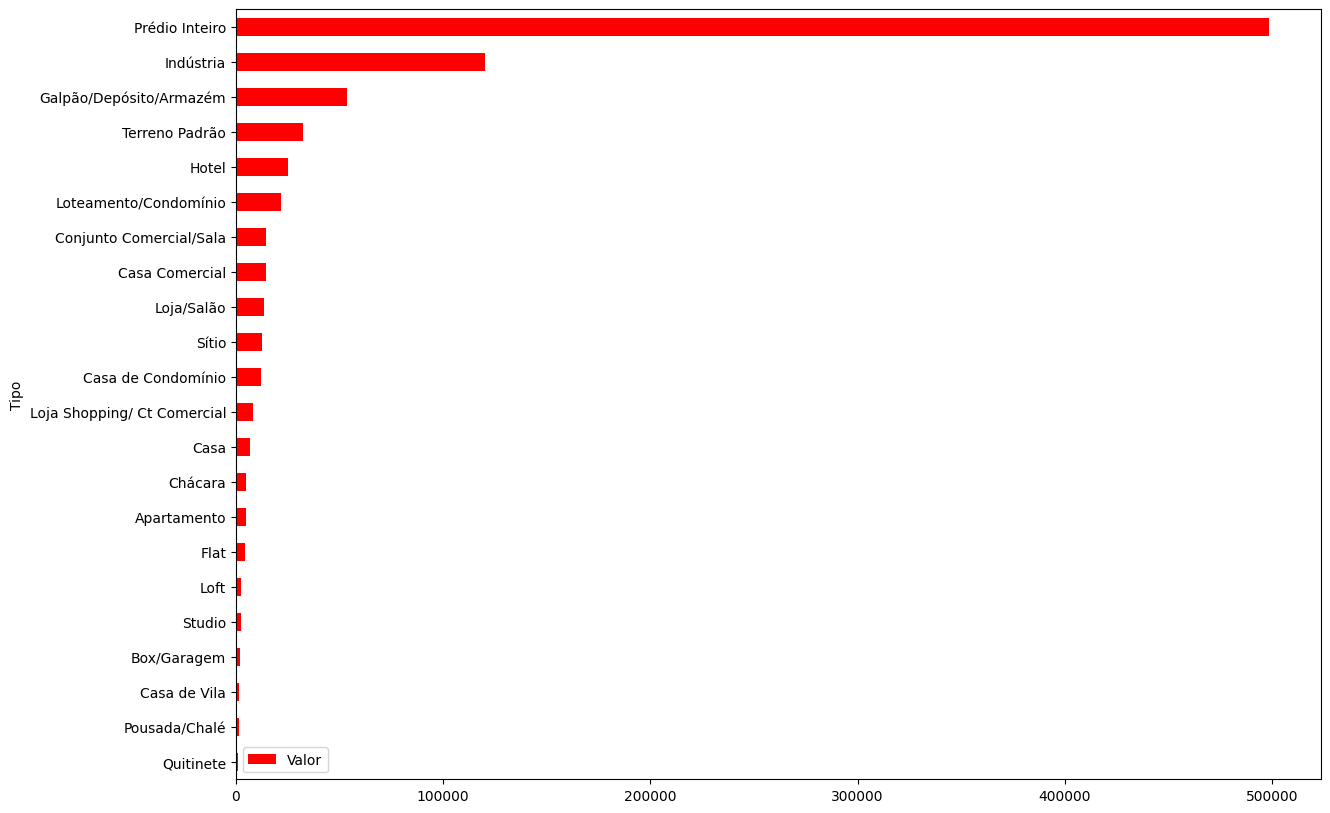

In [53]:
## Quais os valores médios de aluguel por tipo de imóvel?

col = ['Tipo','Valor']
df_preco_tipo = df_raw.loc[:,col].groupby(['Tipo']).mean().sort_values('Valor').reset_index()
df_preco_tipo.plot(x='Tipo',kind='barh', figsize=(14,10), color='red');

Como o interesse da empresa é para gerar modelos de machine learning de imoveis residenciais, é necessário filtrar apenas para esse tipo de imovel

In [55]:
# Removendo imóveis comerciais

df_raw.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [57]:
imoveis_comerciais = ['Conjunto Comercial/Sala','Prédio Inteiro','Loja/Salão', 'Galpão/Depósito/Armazém','Casa Comercial',
                      'Terreno Padrão', 'Loja Shopping/ Ct Comercial','Chácara','Loteamento/Condomínio', 'Sítio', 'Pousada/Chalé', 
                      'Studio', 'Hotel', 'Indústria' ]

In [58]:
#selecionando imoveis comerciais
df_raw.query('@imoveis_comerciais in Tipo')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0
16,Prédio Inteiro,Botafogo,0,0,0,536,28000.0,NaN,3563.0
26,Conjunto Comercial/Sala,São Cristóvão,0,1,0,25,1100.0,600.0,NaN
29,Loja/Salão,Campo Grande,0,1,0,35,1300.0,950.0,NaN
...,...,...,...,...,...,...,...,...,...
32939,Conjunto Comercial/Sala,Barra da Tijuca,0,1,0,36,1100.0,1200.0,270.0
32942,Conjunto Comercial/Sala,Barra da Tijuca,0,1,0,55,2000.0,1096.0,NaN
32946,Conjunto Comercial/Sala,Centro,0,0,0,140,4000.0,1412.0,496.0
32948,Conjunto Comercial/Sala,Centro,0,0,0,32,600.0,1035.0,83.0


In [60]:
#selecionando imoveis residenciais
df = df_raw.query('@imoveis_comerciais not in Tipo')

In [62]:
df.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Box/Garagem', 'Loft'], dtype=object)

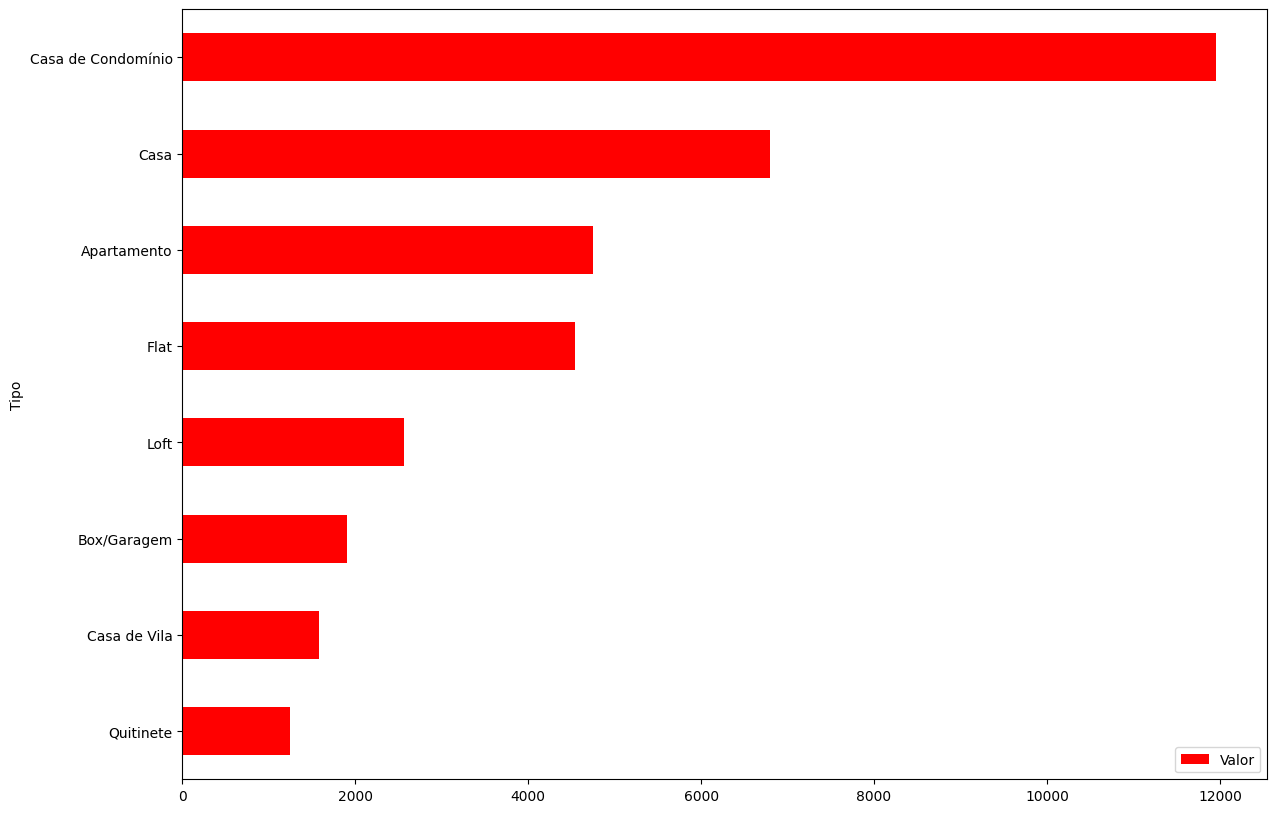

In [63]:
## Quais os valores médios de aluguel por tipo de imóvel residenciais?

col = ['Tipo','Valor']
df_preco_tipo = df.loc[:,col].groupby(['Tipo']).mean().sort_values('Valor').reset_index()
df_preco_tipo.plot(x='Tipo',kind='barh', figsize=(14,10), color='red');

In [73]:
# Qual o percentual de cada tipo de imóvel na nossa base de dados?

df.Tipo.value_counts(normalize=True).to_frame().sort_values('proportion').reset_index()


,Tipo,proportion
0,Loft,0.002199
1,Box/Garagem,0.003536
2,Casa de Vila,0.010738
3,Flat,0.020527
4,Quitinete,0.036052
5,Casa,0.041701
6,Casa de Condomínio,0.042951
7,Apartamento,0.842296


<Axes: xlabel='Tipo', ylabel='Percentual'>

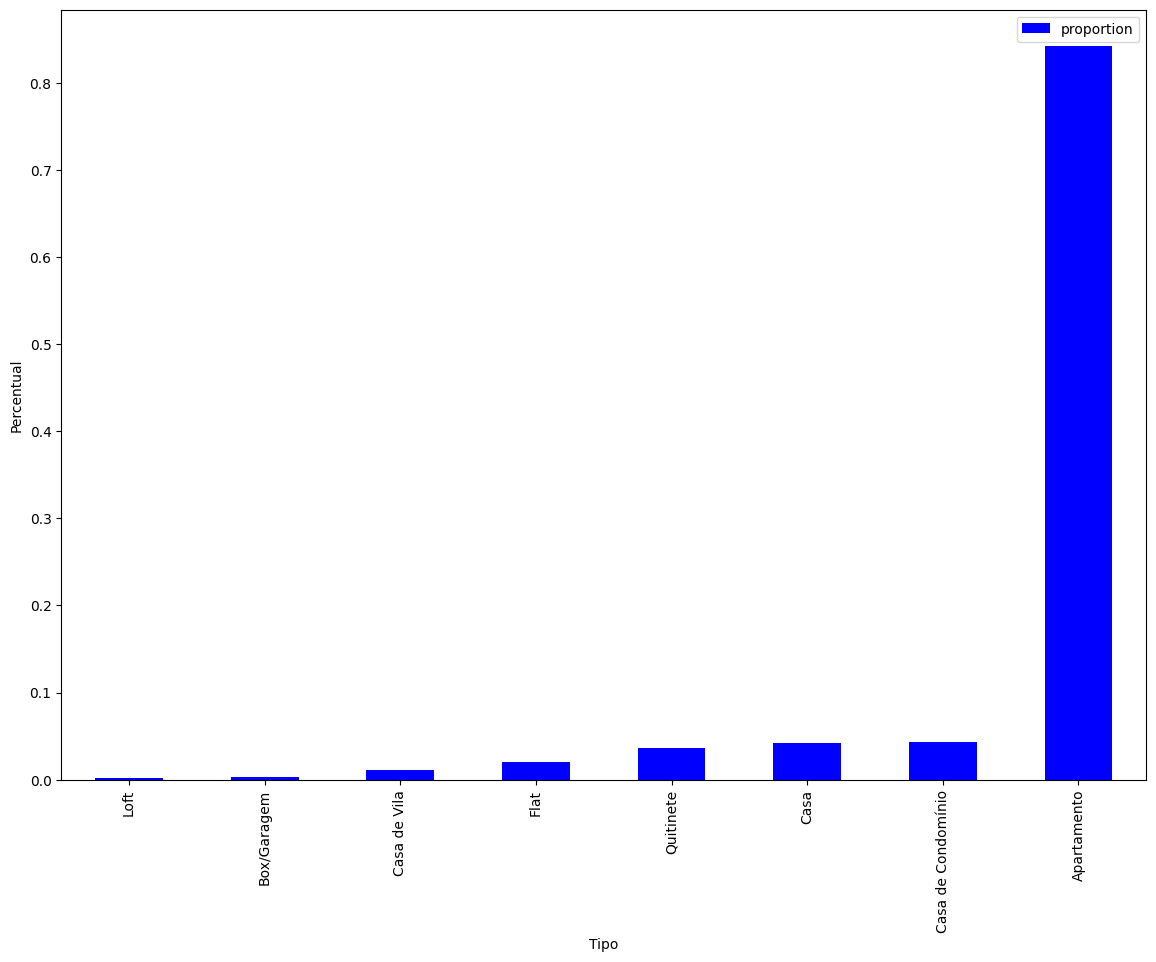

In [77]:
# Gerando graficos
df_percentual_tipo = df.Tipo.value_counts(normalize=True).to_frame().sort_values('proportion').reset_index()
df_percentual_tipo.plot(x='Tipo',kind='bar', figsize=(14,10),color='blue', xlabel='Tipo', ylabel='Percentual')

In [83]:
# Selecionando imóveis do tipo apartamento
df1 = df.query("Tipo == 'Apartamento'")
df1.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
